## Assignment 2 of Group 20

# Task 1

### Problem 1.1

There is 
$$
\begin{aligned}
\mathbf{s}^{\top} \Sigma \Sigma^{T} \mathbf{s} &=\left[s_{1}, \ldots, s_{p}\right]\left[\begin{array}{cc}
\sigma_{1}^{2} & \\
& \ddots \\
& & \sigma_{p}^{2}
\end{array}\right]\left[\begin{array}{c}
s_{1} \\
\vdots \\
s_{p}
\end{array}\right] \\
&=\sum_{i=1}^{p} s_{i}^{2} \sigma_{i}^{2}
\end{aligned}
$$

with  $\sigma_{1} \geq \cdots \geq \sigma_{k}\geq0$,  and  $\|\mathbf{s}\|=1$, i.e.  $\sum_{i=1}^{p} s_{i}^{2}=1.$

Thus, 
$$
\mathbf{s}^{\top} \Sigma \Sigma^{T} \mathbf{s}=\sum_{i=1}^{P} s_{i}^{2} \sigma_{i}^{2} \leqslant \sigma_{1}^{2}\sum_{i=1}^{P} s_{i}^{2} =\sigma_{1}^{2},
$$

when and only when $\mathbf{s}^{\top}=[1,0,...,0],$ the inequality is equal. 
In this case, $\mathbf{s}^{\top} \Sigma \Sigma^{T} \mathbf{s} $ has the maximum $\sigma_1^2$

### Problem 1.2

Write $\mathbf{a}$ as a linear combination of the columns of $\mathbf{U}$
$$\mathbf{a}=\mathbf{U_k},\quad 1\leq k\leq p$$
where $\|\mathbf{a}\|=1.$

Then the empirical variance of the inner products of the columns of $\mathbf{X}$ with a normalized vector $\mathbf{a}$ is given as
$$
\begin{aligned}
\frac{1}{N} \sum_{i=1}^{N}\left(\mathbf{a}^{\top} \mathbf{x}_{i}\right)^{2} 
&=\frac{1}{N} \mathbf{a}^{\top} \mathbf{X} \mathbf{X}^{\top} \mathbf{a} \\
&=\frac{1}{N} \mathbf{a}^{\top}  \mathbf{U}  \boldsymbol{\Sigma} \mathbf{V}^{\top}\mathbf{V}\boldsymbol{\Sigma}\mathbf{U}^{\top}\mathbf{a}\\
&=\frac{1}{N} \mathbf{U_k}^{\top}  \mathbf{U}  \boldsymbol{\Sigma} \boldsymbol{\Sigma}\mathbf{U}^{\top}\mathbf{U_k}\\
\end{aligned}
$$

Because $$\begin{aligned}
\|\mathbf{a}\|=\mathbf{a}^{\top} \mathbf{a} &=\mathbf{U}_{k}^{\top} \mathbf{U}_{k}=\mathbf{U_k}^{\top} \mathbf{U}\mathbf{U}^{\top} \mathbf{U}_{k}=\left(\mathbf{U}^{\top} \mathbf{U}_{k}\right)^{\top} \mathbf{U}^{\top} \mathbf{U_{k}}=1
\end{aligned}$$
so ${\mathbf{U}^\top\mathbf{a}}$ is also a normalized vector.

According to the conclusion in Problem 1.1, when and only when ${\mathbf{U}^\top\mathbf{a}}=[1,0,...,0]^\top$, i.e.$\quad\mathbf{a} = \mathbf{u_1}$(when the normalized vector $\mathbf{a}$ is set to the first column of $\mathbf{U}$),
the empirical variance of the inner products of the columns of $X$ with a normalized vector $\mathbf{a}$,
$$\frac{1}{N} \sum_{i=1}^{N}\left(\mathbf{a}^{\top} \mathbf{x}_{i}\right)^{2}=\frac{1}{N} \mathbf{a}^{\top} \mathbf{X} \mathbf{X}^{\top} \mathbf{a},$$

is maximized .

# Task 2

### Problem 2.1

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
data_folder = './yaleBfaces/'

total_image = 70
T = np.zeros([2500, total_image])
for i in range(total_image//7):
        for j in range(total_image//10):
            impath = data_folder + 'subset' + str(0) + '/person' + str(i+1).zfill(2)  + '_' + str(j+1).zfill(2) + '.png'
            T[:, i*7 + j] = ((np.array(imageio.imread(impath)).astype(np.float64)).ravel()) / 255

def vec_subset(T):  
    mean = np.mean(T, axis = 1)
    norm_T = (T.T - mean.T).T
    U, s, V = np.linalg.svd(norm_T)   
    return U[:, :20]
        
U0 = vec_subset(T)
print(U0)


[[-0.01329749 -0.03658463 -0.01750791 ... -0.00115633  0.00109892
   0.00149244]
 [-0.01226758 -0.03534601 -0.01206912 ... -0.0302234   0.0087793
   0.00450264]
 [-0.01200115 -0.04161088 -0.00811086 ... -0.02554369  0.00518084
  -0.01078299]
 ...
 [-0.01156571  0.00533421  0.03478369 ... -0.0058905  -0.01756438
  -0.00515979]
 [-0.0109736  -0.00219448  0.03718597 ... -0.0147811  -0.01308511
  -0.00353958]
 [-0.00960218  0.00180202  0.03922186 ... -0.02487649 -0.01626307
  -0.00345036]]


Display the first 3 vectors as images:

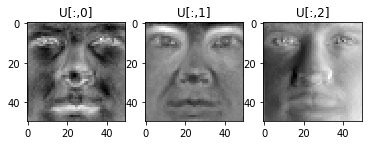

In [3]:
plt.subplot(1,3,1)
I1 = np.reshape(U0[:,0], (50,50))
plt.imshow(I1, 'gray')
plt.title('U[:,0]')
plt.subplot(1,3,2)
I2 = np.reshape(U0[:,1], (50,50))
plt.imshow(I2, 'gray')
plt.title('U[:,1]')
plt.subplot(1,3,3)
I3 = np.reshape(U0[:,2], (50,50))
plt.imshow(I3, 'gray')
plt.title('U[:,2]')
plt.show()

### Problem 2.2

In [4]:
#length of subsets
len0 = 7
len1 = 12
len2 = 12
len3 = 14
len4 = 19

#in total 10 classes
labels = np.array(range(1, 10+1))
#set LABELs to each test data
labels0 = [val for val in labels for i in range(7)]
labels1 = [val for val in labels for i in range(12)]
labels2 = [val for val in labels for i in range(12)]
labels3 = [val for val in labels for i in range(14)]
labels4 = [val for val in labels for i in range(19)]
#concatenate labels
S_labels = np.concatenate((labels1, labels2, labels3, labels4))

#set test samples S
S = np.zeros([2500, len(labels1) + len(labels2) + len(labels3) + len(labels4)])
for i in range(10):
    for j in range(len1):
        impath1 = data_folder + 'subset' + str(1) + '/person' + str(i+1).zfill(2) + '_' + str(8+j).zfill(2) + '.png'
        S[:, i*len1 + j] = ((np.array(imageio.imread(impath1)).astype(np.float64)).ravel()) / 255
    for j in range(len2):
        impath2 = data_folder + 'subset' + str(2) + '/person' + str(i+1).zfill(2) + '_' + str(8+len1+j).zfill(2) + '.png'
        S[:, 10*len1 + i*len2 + j] = ((np.array(imageio.imread(impath2)).astype(np.float64)).ravel()) / 255
    for j in range(len3):
        impath3 = data_folder + 'subset' + str(3) + '/person' + str(i+1).zfill(2) + '_' + str(8+len1+len2+j).zfill(2) + '.png'
        S[:, 10*(len1+len2) + i*len3 + j] = ((np.array(imageio.imread(impath3)).astype(np.float64)).ravel()) / 255
    for j in range(len4):
        impath4 = data_folder + 'subset' + str(4) + '/person' + str(i+1).zfill(2) + '_' + str(8+len1+len2+len3+j).zfill(2) + '.png'
        S[:, 10*(len1+len2+len3) + i*len4 + j] = ((np.array(imageio.imread(impath4)).astype(np.float64)).ravel()) / 255

#test samples of each subset
S1 = S[:, :len(labels1)]   
S2 = S[:, len(labels1):len(labels1)+len(labels2)]
S3 = S[:, len(labels1)+len(labels2):len(labels1)+len(labels2)+len(labels3)]
S4 = S[:, len(labels1)+len(labels2)+len(labels3):len(labels1)+len(labels2)+len(labels3)+len(labels4)]

In [5]:
#function output error rate
#input: training samples 'T', test samples 'S', labels of test samples 'labels', k PCs 'k'
def classifi(T, S, labels, k):
    #distance matrix
    D = np.zeros((len(labels), len(labels0)))
    #the k singular vectors of training samples
    Uk0 = U0[:, :k]
    #the training samples in the reduced space
    reduc_T = Uk0.T @ T
    #the test samples in the reduced space
    reduc_S = Uk0.T @ S
    #calculate euclidean distance
    for i in range(len(labels)):
        D[i, :] = np.sqrt(np.sum((np.expand_dims(reduc_S[:, i], axis = 1) - reduc_T)**2, axis = 0))
        
    #Determining nearest neighbors
    #sorting
    NN = np.argsort(D, axis = 1) 
    #choose the 3 nearsest neighbors
    NN = NN[:, 0:3]
    
    #convert index to label
    nearest_neighbors = np.zeros((len(labels),3))
    for j in range(len(labels)):
        for i in range(3):
            neighbor_index = NN[j, i]
            nearest_neighbors[j, i] = labels0[neighbor_index]
    
    #KNN
    result_labels = []  
    for j in range(len(labels)):
        classCount = {}    #define a dictionary
        for i in range(3):
            result_label = nearest_neighbors[j,i]
            classCount[result_label] = classCount.get(result_label, 0) + 1 
        sortedClassCount = sorted(classCount.items(), key=lambda x: x[1], reverse=True)
        result_labels.append(int(sortedClassCount[0][0]))
    #print(result_labels)
    
    #error rate
    error_num = 0
    for i in range(len(labels)):
        if (labels[i] != result_labels[i]):
            error_num += 1
    error_rate = error_num/len(labels)
    
    return error_rate

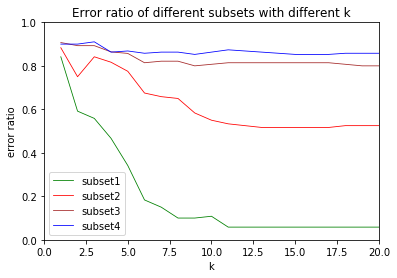

In [6]:
#subset1234
x = list(range(1, 20+1))
y1 = []
y2 = []
y3 = []
y4 = []
for i in range(1, 20+1):
    k_error_rate1 = classifi(T, S1, labels1, i)
    y1.append(k_error_rate1)
    k_error_rate2 = classifi(T, S2, labels2, i)
    y2.append(k_error_rate2)
    k_error_rate3 = classifi(T, S3, labels3, i)
    y3.append(k_error_rate3)
    k_error_rate4 = classifi(T, S4, labels4, i)
    y4.append(k_error_rate4)
    
plt.xlim(0,20)
plt.ylim(0,1)
plt.plot(x, y1, color='green', label='subset1', linewidth=0.8)
plt.plot(x, y2, color='red', label='subset2', linewidth=0.8)
plt.plot(x, y3, color='brown', label='subset3', linewidth=0.8)
plt.plot(x, y4, color='blue', label='subset4', linewidth=0.8)
plt.xlabel('k')
plt.ylabel('error ratio')
plt.title('Error ratio of different subsets with different k')
plt.legend(loc=3)
plt.show()

### Problem 2.3 

In [7]:
#function output error rate
#input: training samples 'T', test samples 'S', labels of test samples 'labels', k PCs 'k'
def classifi1(T, S, labels, k):
    #distance matrix
    D = np.zeros((len(labels), len(labels0)))
    #the k singular vectors of training samples
    Uk0 = U0[:, 3:k]
    #the training samples in the reduced space
    reduc_T = Uk0.T @ T
    #the test samples in the reduced space
    reduc_S = Uk0.T @ S
    #calculate euclidean distance
    for i in range(len(labels)):
        D[i, :] = np.sqrt(np.sum((np.expand_dims(reduc_S[:, i], axis = 1) - reduc_T)**2, axis = 0))
        
    #Determining nearest neighbors
    #sorting
    NN = np.argsort(D, axis = 1) 
    #choose the 3 nearsest neighbors
    NN = NN[:, 0:3]
    
    #convert index to label
    nearest_neighbors = np.zeros((len(labels),3))
    for j in range(len(labels)):
        for i in range(3):
            neighbor_index = NN[j, i]
            nearest_neighbors[j, i] = labels0[neighbor_index]
    
    #KNN
    result_labels = []  
    for j in range(len(labels)):
        classCount = {}    #define a dictionary
        for i in range(3):
            result_label = nearest_neighbors[j,i]
            classCount[result_label] = classCount.get(result_label, 0) + 1 
        sortedClassCount = sorted(classCount.items(), key=lambda x: x[1], reverse=True)
        result_labels.append(int(sortedClassCount[0][0]))
    #print(result_labels)
    
    #error rate
    error_num = 0
    for i in range(len(labels)):
        if (labels[i] != result_labels[i]):
            error_num += 1
    error_rate = error_num/len(labels)
    
    return error_rate

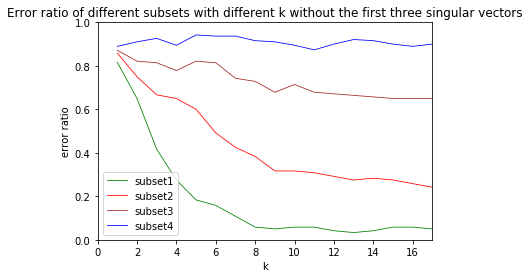

In [9]:
#subset1234
x1 = list(range(1, 20-3+1))
y11 = []
y21 = []
y31 = []
y41 = []
for i in range(4, 20+1):
    k_error_rate11 = classifi1(T, S1, labels1, i)
    y11.append(k_error_rate11)
    k_error_rate21 = classifi1(T, S2, labels2, i)
    y21.append(k_error_rate21)
    k_error_rate31 = classifi1(T, S3, labels3, i)
    y31.append(k_error_rate31)
    k_error_rate41 = classifi1(T, S4, labels4, i)
    y41.append(k_error_rate41)
    
plt.xlim(0,17)
plt.ylim(0,1)
plt.plot(x1, y11, color='green', label='subset1', linewidth=0.8)
plt.plot(x1, y21, color='red', label='subset2', linewidth=0.8)
plt.plot(x1, y31, color='brown', label='subset3', linewidth=0.8)
plt.plot(x1, y41, color='blue', label='subset4', linewidth=0.8)
plt.xlabel('k')
plt.ylabel('error ratio')
plt.title('Error ratio of different subsets with different k without the first three singular vectors')
plt.legend(loc=3)
plt.show()

Compare the results of Problem2.2 & Problem2.3 (all 20 singular vectors & without the first 3 singular vectors)

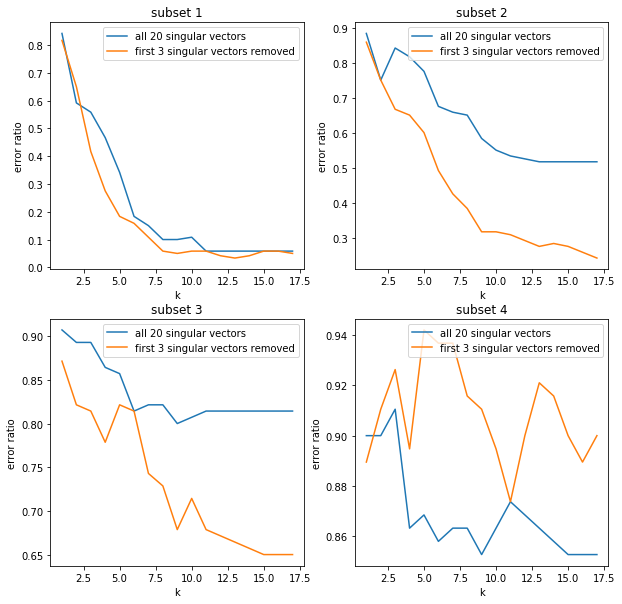

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(x[:17], y1[:17], label='all 20 singular vectors')
plt.plot(x1, y11, label='first 3 singular vectors removed')
plt.title('subset 1')
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

plt.subplot(2,2,2)
plt.plot(x[:17], y2[:17], label='all 20 singular vectors')
plt.plot(x1, y21, label='first 3 singular vectors removed')
plt.title('subset 2')
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()


plt.subplot(2,2,3)
plt.plot(x[:17], y3[:17], label='all 20 singular vectors')
plt.plot(x1, y31, label='first 3 singular vectors removed')
plt.title('subset 3')
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

plt.subplot(2,2,4)
plt.plot(x[:17], y4[:17], label='all 20 singular vectors')
plt.plot(x1, y41, label='first 3 singular vectors removed')
plt.title('subset 4')
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()


plt.show()